# #Importing the necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#  Import the requried dataset

In [2]:
df=pd.read_csv('C:/Users/abhis/Documents/diabets.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

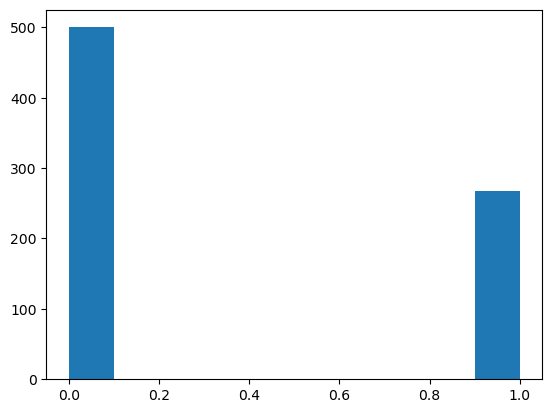

In [23]:
plt.hist(df["Outcome"])
plt.show()

In [7]:
x=df.drop(['Outcome'],axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Split  the dataset 

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=100)


In [12]:
print("xtrain:", xtrain.shape)
print("xtest:", xtest.shape)
print("ytrain:", ytrain.shape)
print("ytest:", ytest.shape)


xtrain: (652, 8)
xtest: (116, 8)
ytrain: (652,)
ytest: (116,)


# Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)


In [14]:
train_score=model.score(xtrain,ytrain)
print("train_score",train_score)
test_score=model.score(xtest,ytest)
print("test_score",test_score)


train_score 1.0
test_score 0.6551724137931034


In [15]:
model1=DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005)
model1.fit(xtrain,ytrain)
print("train_accuracy=",model1.score(xtrain,ytrain))
print("test_accuracy=",model1.score(xtest,ytest))

train_accuracy= 0.8328220858895705
test_accuracy= 0.7327586206896551


# RANDOM FOREST CALSSIFIER 

In [17]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)

In [18]:
train_score=model.score(xtrain,ytrain)
print("train_score",train_score)
test_score=model.score(xtest,ytest)
print("test_score",test_score)


train_score 1.0
test_score 0.7327586206896551


In [19]:
model1=DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005)
model1.fit(xtrain,ytrain)
print("train_accuracy=",model1.score(xtrain,ytrain))
print("test_accuracy=",model1.score(xtest,ytest))

train_accuracy= 0.8328220858895705
test_accuracy= 0.7327586206896551


# confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,y_pred)

array([[64, 11],
       [20, 21]], dtype=int64)